In [2]:
#%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [3]:
import os
for dirname, _, filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\ks-projects-201612.csv
input\ks-projects-201801.csv


In [97]:
prj2018 = pd.read_csv("input\ks-projects-201801.csv")

In [98]:
prj2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [99]:
prj2018.pop('name')
prj2018.pop('ID')
prj2018.pop('usd pledged')

0            0.0
1          100.0
2          220.0
3            1.0
4         1283.0
           ...  
378656      25.0
378657     155.0
378658      20.0
378659     200.0
378660     524.0
Name: usd pledged, Length: 378661, dtype: float64

In [100]:
print('Unique values in `state` column:', list(prj2018.state.unique()))

Unique values in `state` column: ['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']


In [101]:
prj2018.head()
prj2018.shape
print(prj2018.iloc[0,0])

Poetry


In [102]:
deadlines = prj2018.pop('deadline')
launches = prj2018.pop('launched')
deadlines.head()

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
Name: deadline, dtype: object

In [103]:
count = 0
new_data = pd.DataFrame({'time':int()},index = deadlines.index, columns = ['time'],dtype=int) 
for x in deadlines:
    temp_str_1 = str(deadlines.iloc[count])
    temp_str_2 = str(launches.iloc[count])
    
    temp_int_1_y = int(temp_str_1[0:4])
    temp_int_2_y = int(temp_str_2[0:4])
    temp_int_1_m = int(temp_str_1[5:7])
    temp_int_2_m = int(temp_str_2[5:7])
    temp_int_1_d = int(temp_str_1[8:])
    temp_int_2_d = int(temp_str_2[8:10])
    
    temp_int = (temp_int_1_y - temp_int_2_y)*365 + (temp_int_1_m - temp_int_2_m)*30 + (temp_int_1_d - temp_int_2_d) + 1.0 - 1.0
    #new_data.loc[count] = np.float64(temp_int)
    new_data.loc[count] = temp_int
    count += 1
new_data.head()

,time
0,58.0
1,59.0
2,44.0
3,29.0
4,55.0


In [104]:
#new_data = new_data.astype(str).astype(int)
new_data.dtypes

time    float64
dtype: object

In [105]:
prj2018 = prj2018.join(new_data)
#prj2018 = prj2018.rename(columns={'deadline': 'time'})

In [106]:
prj2018 = prj2018.query('state != "live"')
#prj2018 = prj2018.assign(outcome=(prj2018['state'] == 'successful').astype(int))

In [107]:
states = pd.DataFrame({'state':int()},index = prj2018.index, columns = ['state'],dtype=int)
states.loc[prj2018['state'] == "successful", 'state'] = 1
states.loc[prj2018['state'] != "successful", 'state'] = 0

In [108]:
prj2018.pop('state')
prj2018 = prj2018.join(states)

In [109]:
prj2018.dtypes

category             object
main_category        object
currency             object
goal                float64
pledged             float64
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
time                float64
state                 int32
dtype: object

In [110]:
#prj2018.dtypes
print('Unique values in `state` column:', list(prj2018.state.unique()))

Unique values in `state` column: [0, 1]


In [111]:
x_prj2018_trn = prj2018.iloc[:340795,:]
x_prj2018_eval = prj2018.iloc[340795:,:]

In [112]:
y_prj2018_trn = x_prj2018_trn.pop('state')
y_prj2018_eval = x_prj2018_eval.pop('state')

In [113]:
y_prj2018_trn.describe()

count    340795.000000
mean          0.356678
std           0.479019
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: state, dtype: float64

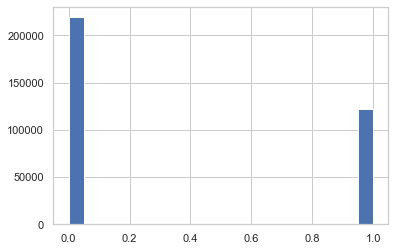

In [114]:
y_prj2018_trn.hist(bins=20)

In [115]:
x_prj2018_eval.head()
x_prj2018_trn.dtypes

category             object
main_category        object
currency             object
goal                float64
pledged             float64
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
time                float64
dtype: object

In [116]:
CATEGORICAL_COLUMNS = ['category', 'main_category', 'currency', 'country','backers']
NUMERIC_COLUMNS = ['goal', 'pledged','usd_pledged_real','usd_goal_real','time']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = x_prj2018_trn[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

feature_name forin NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float64))

print(feature_columns)

[VocabularyListCategoricalColumn(key='category', vocabulary_list=('Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants', 'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction', 'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design', 'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater', 'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks', 'Public Art', 'Illustration', 'Photography', 'Pop', 'People', 'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts', 'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks', 'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance', 'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama', 'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight', 'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk', "Children's Books", 'Audio', 'Performan

In [117]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_prj2018_trn, y_prj2018_trn)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_prj2018_eval, y_prj2018_eval, num_epochs=4, shuffle=False)

In [118]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KAAN_A~1\\AppData\\Local\\Temp\\tmpzz8mk9yj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [119]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.9883081


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KAAN_A~1\AppData\Local\Temp\tmpzz8mk9yj\model.ckpt-106500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


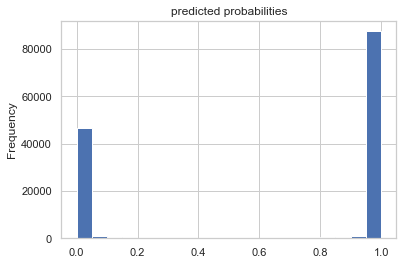

In [121]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][0] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')